In order to successfully complete this assignment you must:
1. Do the required reading, watch the provided videos and complete all instructions in this notebook.
2. The assignment must be submitted to the exercises folder in the `cmse802-yourlastname` repository on or before **8:00 am the day before the class**.  Late assignment will receive <=80% of the grade.

Students must come to class the next day prepared to discuss the material covered in this assignment. 

### <p style="text-align: right;"> &#9989; Put your name here: Pavan Yachamanni </p>


---
# __Pre-Class Assignment: Optimization I__

We define Optimization to be a class of problems that try to find the "best" solution over a range of possible solutions.  Typically "best" means finding the maximum (or minimum) value of some sort of calculation. 

# Learning objectives

At the end of the exercise, you should be able to:
- Explain examples of optimization problems.
- Distinguish model parameters and model hyperparameters.
- Write math equation with LaTex and `sympy`.
- Apply four common optimization approaches.
- Use `Scipy`'s optimization library.

# Outline

1. [What are we trying to optimize?](#What_are_we_trying_to_optimize)
1. [Common Optimization Approaches](#Common_Optimization_Approaches)
1. [Assignment wrap-up](#Assignment_wrap-up)

----
<a name="What_are_we_trying_to_optimize"></a>
# 1. What are we trying to optimize?

The following are some example optimization problems we may use in computational and data sciences. 

* **Mathematical Models:** Often in science we have designed a mathematical model which we then try to fit to experimental data. Sometimes this can be done directly (regression) but often requires trying different parameters. Model optimization (also called parameter optimization) is the process of searching through the model parameters to find the best ones that fit the data.  

* **Machine Learning:** In Machine learning where we have a set of input data that correspond to expected outputs and we use the input/output data to "train" machine learning algorithms and minimize the error between the estimated output and the true output. These models tend to be more general (like neural networks) such that the algorithms search not only the parameters of the models but also over different models. 

* **Hyperparameter Optimization:** Algorithms can often have lots of input options that "tune" how the algorithm performs on a particular problem.  [Hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization) is the process of searching though all of these _tunable parameters_ (tuned by you as opposed to parameters that an algorithm will search through) to find one that allow for best performance of the algorithm. They are called __hyperparameter__ when the algorithms that are being optimized are machine learning algorithms that can be doing their own optimization (i.e. we are trying to learn the best machine learning algorithm). 

* **Algorithmic Performance Optimization:** Another common application of optimization in computational and data science is optimizing the performance of an algorithm. Typically this means speeding up the calculations but may also include optimizing for resources such as computer memory. We covered this earlier partly when we talked about code optimization.

&#9989; <font color=red>**QUESTION:**</font>  Read this article by Jason Brownlee on ["What is the Difference Between a Parameter and a Hyperparameter?"](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/) After reading this, can you summarize, in your own words, how model parameter and model hyperparameter differ?

<font size=+3>&#9998;</font> 
1. Parameters are needed to be found out from data but hyper parameters can be initialized to find best parameters.
2. Example: Weights are model parameters and learning rate is model hyperparameter.

## 1.2 LaTeX, MathJax and symbolic Python

Throughout the class, mathematical equations are either embedded in Markdown cells or output from Python in code cells in Jupyter notebook. This is accomplished through using three things:

- [__LaTex__](https://www.latex-project.org/): (pronounced [lay-tek]) a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation.
- [__MathJax__](https://www.mathjax.org/): A JavaScript display engine for mathematics in various browsers.
- [__Symbolic Python__](https://maths-with-python.readthedocs.io/en/latest/07-sympy.html): a Python library for symbolic mathematics. It aims to be an alternative to systems such as Mathematica or Maple while keeping the code as simple as possible and easily extensible. 

&#9989; <font color=blue>**DO THIS:**</font> Watch the following video on how to make Math look good with LaTex and `sympy`:

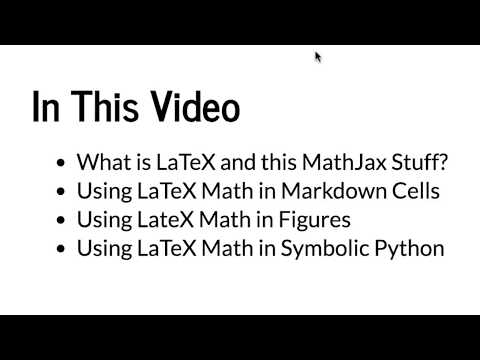

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("qgSa7n_zQ3A",width=640,height=320, cc_load_policy=True)

&#9989; <font color=blue>**DO THIS:**</font> In the following markdown cell, use LaTex to write the following, wave equation we used in the introduction to modeling exercise:

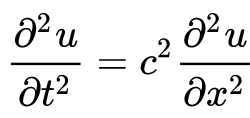

<font size=+3>&#9998;</font> Replace with your answer to the above question!

$$ d^2u/dt^2 = c^2*d^2u/dx^2 $$

&#9989; <font color=blue>**DO THIS:**</font> Install `sympy` and use sympy to write codes that will print out the following equation:

$$y=\frac{1}{x^2}$$

In [ ]:
!pip install sympy

In [1]:
# put your codes here
import sympy as sp

In [2]:
x,y = sp.symbols("x,y")

In [3]:
y = 1/x**2

In [4]:
y

x**(-2)

----
<a name="Common_Optimization_Approaches"></a>

# 2.  Common Optimization Approaches
When setting up an optimization problem there are two major factors that need to be consider:

1. How is the "search space" defined for the problem?
2. What is the "fitness" function that is being optimized?

For the purposes of this class we will consider the following example where we want to minimize the function $3x^2 - 10x + 4$ over the range [-10,10].

Let's consider the following approaches:

- [Analytic solutions](#Analytic_solutions)
- [Brute Force Methods](#Brute_Force_Methods)
- [Iterative Methods](#Iterative_Methods)
- [Random Methods](#Random_Methods)

<a name="Analytic_solutions"></a>
## 2.1 Analytic solutions

Remember from basic calculus, if the search space for your problem can be represented as a analytic function $f$ that is being minimized it may be possible to directly calculate the minimum of that function.  First you would need to calculate the value of the function at the search space boundaries and then compare the boundary values with the values for which __the derivative of $f$ is zero__. 

For more on this see [Mimimization and Maximization Refresher](https://mathinsight.org/minimization_maximization_refresher).

Although a powerful approach, analytic solutions only tend to work with problems that have a search space that are mathematically well defined. 

&#9989; <font color=blue>**DO THIS:**</font> Run the Following cells that:

- Uses symbolic python library to represent $y = 3x^2 - 10x + 4$.
- Find the minimum by solving for when the derivative is equal to zero. 

In [5]:
%matplotlib inline 
import sympy as sym

sym.init_printing()

# First we define our symbols and our function as follows:
x = sym.symbols('x')
y = 3*x**2 - 10*x + 4
y

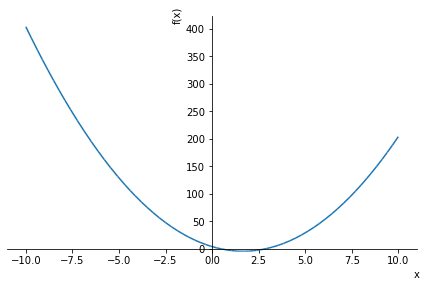

In [6]:
# Plot the function over the default range
p1 = sym.plot(y)

In [7]:
# Calculate the first derivative using the diff function
dy = sym.diff(y)
dy

In [8]:
# Solve for x analytically
sym.solve(dy,x)

&#9989; <font color=blue>**DO THIS:**</font> In the following cell, write codes that:

- Uses symbolic python library to represent $b = cos(2a) - a$.
- Find the $a$ values that minimize $b$ by solving for when $\frac{db}{da}$ is equal to zero. 

In [10]:
# put your codes here
a = sym.symbols('a')
b= sym.cos(2*a)-a

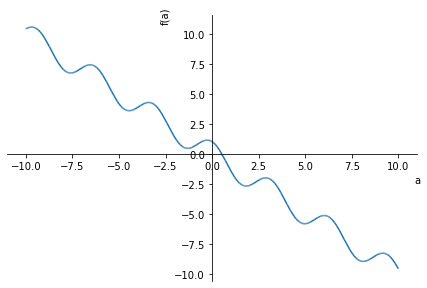

In [11]:
sym.plot(b)

In [14]:
db = sym.diff(b)
db

In [15]:
sym.solve(db,a)

<a name="Brute_Force_Methods"></a>

## 2.2 Brute Force Methods

Assuming there is no easy analytic solution. Probably the most straightforward approach to finding the best solution is to use brute force methods which try to calculate all possible solutions and then pick the one that is the best. These methods require considerable computation power and are only feasible for small problems.  

&#9989; <font color=blue>**DO THIS:**</font> Please watch this video on the basics of ```numpy```. This is included as a review to people still new to python and numpy.  Feel free to skip or run at double speed. 

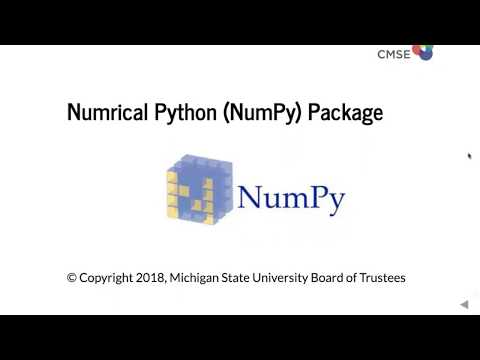

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo("_hbWtNgstlI",width=640,height=320, cc_load_policy=True)

&#9989; <font color=blue>**DO THIS:**</font> Run the following cell that"

- Determine the minimum of the same equation as __section 2.2__ with brute force method. 
- Note that here $x \in [-10,10]$ which is different from the previous equestion.

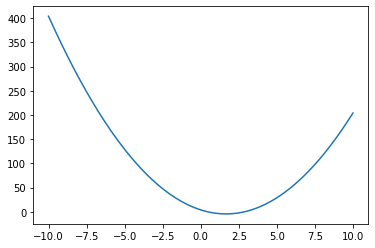

In [23]:
import matplotlib.pylab as plt
import numpy as np

x = np.linspace(-10,10,1000)
y = 3*x**2 - 10*x + 4
plt.plot(x,y)

In [24]:
i = np.argmin(y)
x[i]

<a name="Iterative_Methods"></a>
## 2.3 Iterative Methods

(Note: This section is a preview of Gradient Decent (A type of optimization) later on where we talked about Neural Networks.)

Gradient Decent is an example of an iterative method.  For iterative methods you start by making some sort of guess as to the "best" solution and then refine the guess with better and better solutions.

>Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved using calculus, taking steps in the negative direction of the function gradient.

From: https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

In [25]:
%matplotlib inline
import matplotlib.pylab as plt
from IPython.display import display, clear_output
import time
def show_animation(delay=0.01):
    fig = plt.gcf()
    time.sleep(delay)       # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots

&#9989; <font color=blue>**DO THIS:**</font> Run the following two cells to define and plot the function.

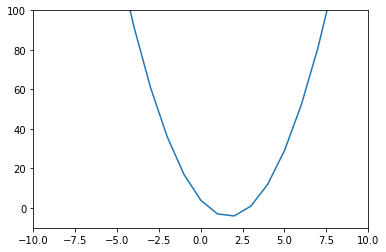

In [26]:
import numpy as np

# Define the function (parabola)
def f1(x):
    return 3*x**2 - 10*x + 4

# Choose the x points
x = np.array([i for i in range(-1000, 1000)])

#Plot the funciton
plt.plot(x, f1(x))
plt.ylim(-10,100)
plt.xlim(-10,10)

&#9989; <font color=blue>**DO THIS:**</font> Below is an implementation of the gradient descent algorithm. Go through the codes and comments on the lines you find important.

In [27]:
#Derivative of F1 (also called the gradient)
def grad_f1(x):
    return 6*x - 10

##Gradient Decent
def grad_descent(x0, eta, p, maxIter, show):
    '''Finding minimum using gradient descent.
    
    Parameters:
      x0 (int) -- Starting point for gradient descent
      eta (float) -- Step size (a.k.a learning rate)
      p (float) -- Chosen precision
      maxIter (int) -- Maximum number of iterations
      show (int) -- show animation (1) or not (0)
    Returns:
      iterative_mins (list) -- a list of minima over the iterations
    '''
    
    former_min = x0
    iterative_mins = [former_min]
    iterCounter = 1

    while True:
        new_min = former_min - eta * grad_f1(former_min)

        iterative_mins.append(new_min)
        if abs(former_min - new_min) <= p:
            print('Local min of function is %f' %new_min)
            print('Number of iterations: %d' %iterCounter)
            break
        else:
            former_min = new_min

        if iterCounter == maxIter:
            print('Local min not reached')
            break
        else:
            iterCounter += 1       

        if show:
            plt.figure(0)
            plt.plot(x, f1(x), lw=3)
            plt.ylim(-10,100)
            plt.xlim(-4,8)
            plt.title(f'iter={str(iterCounter)}, min={str(round(new_min,3))}')
            plt.plot(iterative_mins, f1(np.array(iterative_mins)), marker='o')
            show_animation(0.5)
        
    return iterative_mins

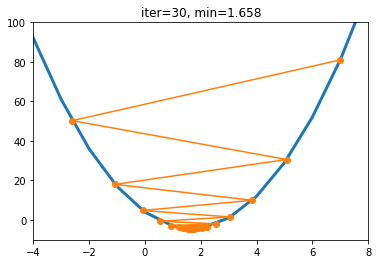

Local min not reached


<Figure size 432x288 with 0 Axes>

In [28]:
# Run gradient descent
iterative_mins = grad_descent(7, 0.3, 0.0001, 30, 1)

Text(0.5, 1.0, 'Iterative change in minimum')

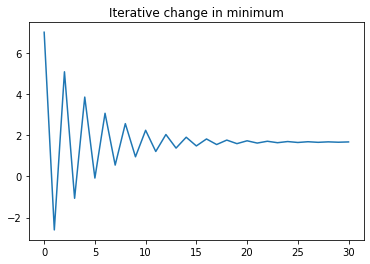

In [29]:
plt.plot(iterative_mins)
plt.title("Iterative change in minimum")

&#9989; <font color=blue>**DO THIS:**</font> In the following three code blocks:

- Call the `gradient_descent` function with the same parameters as before,
- Except setting the learning rate `eta` to be 0.1, 0.01, and 0.001 respectively and `show` to 0.
- For each `eta` setting, plot the `iterative_mins` that is returned.

Local min of function is 1.706020
Number of iterations: 22


Text(0.5, 1.0, 'Iterative change in minimum')

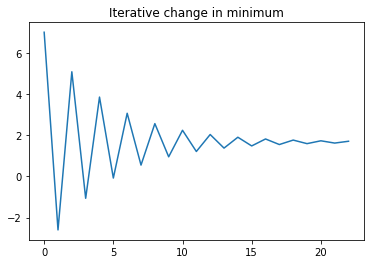

In [32]:
# set eta=0.1, show=0
# Run gradient descent
iterative_mins = grad_descent(7, 0.3, 0.1, 30, 0)
plt.plot(iterative_mins)
plt.title("Iterative change in minimum")

Local min not reached


Text(0.5, 1.0, 'Iterative change in minimum')

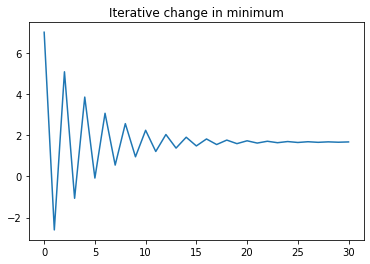

In [33]:
# set eta=0.01, show=0
iterative_mins = grad_descent(7, 0.3, 0.01, 30, 0)
plt.plot(iterative_mins)
plt.title("Iterative change in minimum")

Local min not reached


Text(0.5, 1.0, 'Iterative change in minimum')

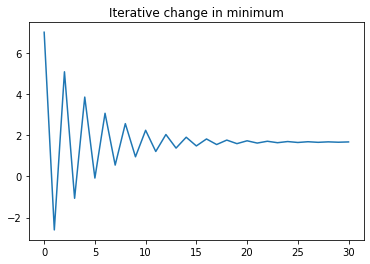

In [34]:
# set eta=0.001, show=0
iterative_mins = grad_descent(7, 0.3, 0.001, 30, 0)
plt.plot(iterative_mins)
plt.title("Iterative change in minimum")

&#9989; <font color=red>**QUESTION:**</font> Which learning rate is the best for this problem? Why?

<font size=+3>&#9998;</font> nta=0.1 is the best learng rate as it converges to minima faster.

<a name="Random_Methods"></a>
## 2.4 Random Methods

Also called [Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method), random methods are just that, random. These methods randomly start and different points within a search space. With enough random samples distributed across the search space we may be able to assume (for some problems) that we found a good solution. Monte Carlo Methods are often combined with iterative methods to come up with fairly robust solutions (there is no guarantee of optimality). 

&#9989; <font color=blue>**DO THIS:**</font> Below is an implementation of a random method for finding a solution for $y=3x^2 -10x + 4$. Go through the codes and comments on the lines you find important.

In [51]:
from random import uniform

searchspace = [-10,10]
best_y = 10000
best_x = []
for i in range(1000):
    x = uniform(-10,10)
    y = 3*x**2 - 10*x + 4
    if y < best_y:
        best_y = y
        best_x = x
        
best_x

&#9989; <font color=red>**QUESTION:**</font> Which would you change above so the result is even closer to the analytical solution ($\frac{5}{3}$)?

<font size=+3>&#9998;</font> By increasing the number of iterations, we can have a slight chance the condition to be met and we can update to further minima possible.

----
<a name="Assignment_wrap-up"></a>
# 3. Assignment wrap-up

Please answer the qeustions below.  **You must completely fill them out in order to receive credit for the assignment!**

Please fill out the [pre-class survey](https://docs.google.com/forms/d/e/1FAIpQLSfhEjAujkrA3E5h739qRzj9buceC2PhbCrSnc6ecHZoDydroQ/viewform) to receive credit for this assignment.


---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit this notebook file before the assignment due date.

&#169; Copyright 2021,  Michigan State University Board of Trustees